<a href="https://colab.research.google.com/github/elsagomdef/AA_PRACTICA1_GRUPO_8.ipynb/blob/main/AA_PRACTICA1_GRUPO_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo 8


Elsa Gómez Defarges

Laura Torres Rueda

# **PRÁCTICA 1:Configuración y Entrenamiento de una Red de Neuronas**



## ***1. Introducción***

En esta práctica se va a crear un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluadoy mejoradopara posteriormente usarlo para hacer predicciones. 

Para ello se creará un modelo en Keras y se aplicarán todos los pasos al conjunto de datos Fashion-MNIST, precargado en Keras.

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando (www.zalando.com). El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles).


## ***2. Desarrollo***

En primer lugar, importamos la libreria y nos cercioramos de que estamos trabajando en una versión igual o superior a la 2.0.0 y con un GPUs

In [ ]:
# 1. IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

# librerias necesarias para crear la arquitectura de la red
from keras import models
from keras import layers

# Librerías de ayuda
import numpy as np
import matplotlib.pyplot as plt

2.6.0
GPU Available: []
2.6.0


Una vez comprobado esto, cargamos el set de datos de moda de MNIST 

In [ ]:
# 2. CARGAMOS EL CONJUNTO DE DATOS MNIST EN KERAS
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


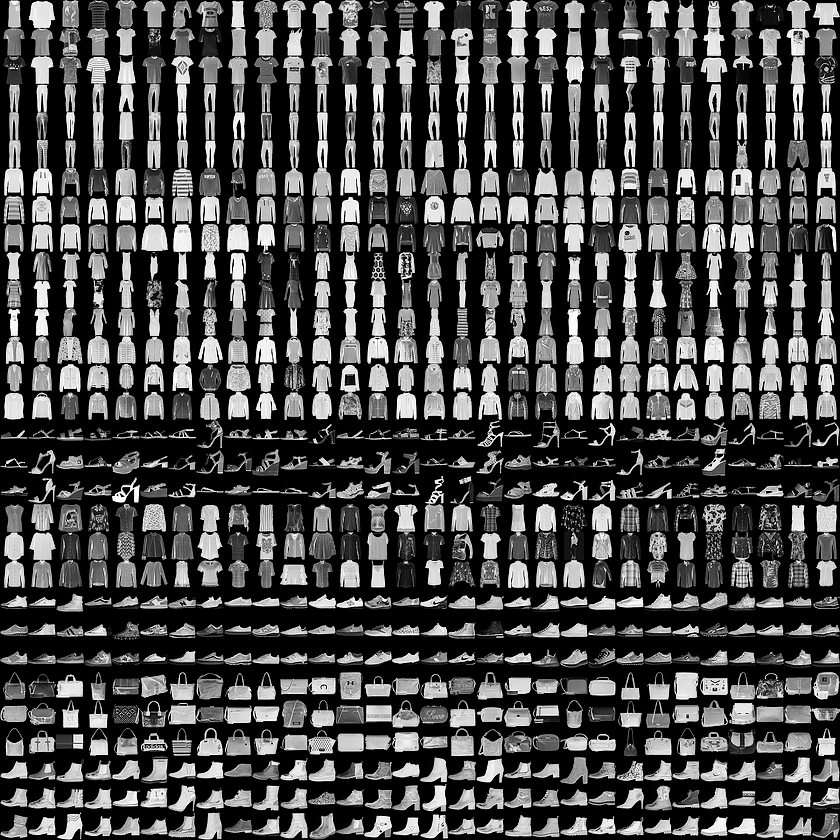

Estas 60.000 imágenes se usarán para entrenar a la red neuronal y 10.000 se usan para valorar con que exactitud aprende la red

###**2.1 Análisis de los datos**

Observamos los datos de entrenamiento que tenemos:

In [ ]:
print(train_images.shape) #comprobamos que los datos tienen la forma esperada (60000, 28, 28)

(60000, 28, 28)


Como podemos observar, el set de entrenamiento cuenta con 60000 imágenedes de 28x28 píxeles

In [ ]:
len(train_labels) 

60000

Creamos un vector de 10 dimensiones que recogerá los nombres de las distintas prendas de ropa que vamos a tratar, cada prenda llevará asignado un número. Por ejemplo, un vestido = 3 y una zapatilla = 7. 

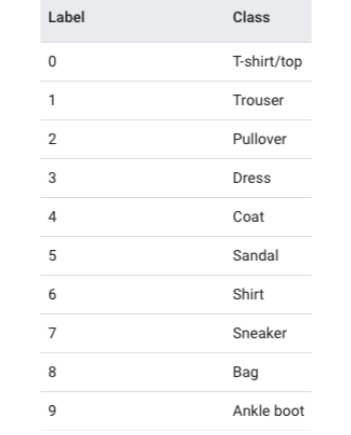

Cada etiqueta es un dígito entre 0 y 9, comprobamos las etiquetas puestas a cada imagen

In [ ]:
class_names = ['Camiseta', 'Vaquero', 'Sudadera', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']

In [ ]:
train_labels 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

A continuación, vamos a analizar la posición 1 del array anterior. Se trata de un 0 que eso equivale a una camiseta.

In [ ]:
train_labels[1]

0

Creamos su matriz (28x28)

In [ ]:
train_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

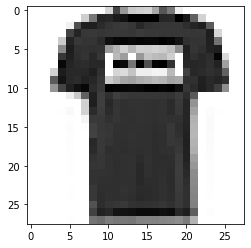

In [ ]:
# Veamos el elemento 1 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Los datos de prueba:

Observamos que contamos con 10000 imágenes de 28x28

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

test_labels.shape, test_labels

((10000,), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

### **2.2 Pre procesado de los datos**

Antes de pasar al entrenamiento de la red, los datos deben ser pre procesados para poder obtener un conjunto de datos finales de calidad y útiles para la extracción de conocimiento. Al observar la imagen que acabamos de analizar, se puede observar que los valores de los píxeles se encuentran todos entre 0 y 255:


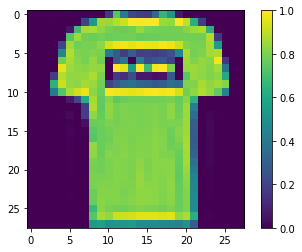

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Escalamos dichos valores en un rango del 0 al 1, para hcer esto dividimos el *training set* y el *testing set* entre 255

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para comprobar que todos los datos están en el formato correcto y listos para construir y entrenar la red, desplegamos del *training set* las 25 primeras imágenes con su etiqueta

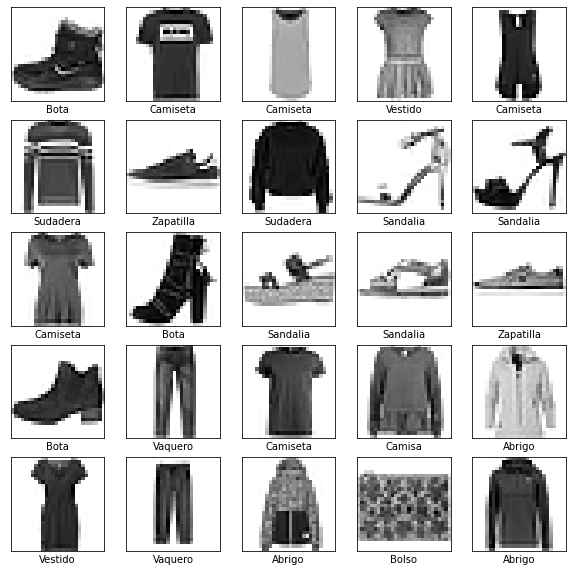

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### **2.3 Creación de la RNA**

**Construir el modelo**

Para empezar debemos crear la red neuronal a partir de la cual configuraremos las capas y compilaremos el modelo

#### **MODELO 1**

**Configurar las capas**

Una capa es el componente básico de una red neuronal. Las capas extraen representaciones de los datos introducidos en ellas, que deberían ser más significativas para el problema en cuestión. El principal objetivo será unir capas sencillas con unos parámetros ya establecidos (10).

Nuestra primera capa, es la capa Flatten, la cual transforma el formato de las imágenes de un arreglo bi-dimensional (28x28 píxeles) a un arreglo unidimensional (28x28 pixeles = 784 píxeles) y reformatea el set de datos. 
Añadiendo la capa .Flatten unidimensionalizamos la entrada multidimensional.

Después nos encontramos con dos capas Dense conectadas. La primera con 128 neuronas y la segunda con 10 nodos softmax que devuelven 10 probabilidades que suman 1 en total. 

In [ ]:
modelo1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Utilizamos la función de activación relu la cual transforma los valores introducidos anulando los valores negativos y dejando los positivos tal y como entran.

Mientras que la función de activación softmax transforma las salidas a una representación en forma de probabilidades, de tal manera que el sumatorio de todas las probabilidades de las salidas de 1

**Compilar el modelo**

Antes de pasar al entrenamiento del modelo, se  requieren algunas modificaciones más que se añaden durante la compilación del sistema: 

*   Una función de pérdida: es cómo la red podrá medir qué tan bien está haciendo el trabajo con los datos de entrenamiento y, por lo tanto, cómo será capaz de dirigirse en la dirección correcta
*   Un optimizador: Actualización del modelo en función del set de datos y la función de pérdida. 
*   Métrica: Monitorea los pasos de entrenamiento y de pruebas. 






In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
modelo1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 'categorical_crossentropy' es la función de pérdida que se utiliza como señal
# de retroalimentación para aprender los tensores de peso y que la fase de 
# entrenamiento intentará minimizar

**Entrenar el modelo**

En primer lugar, entregamos los datos de entrenamiento al sistema (en nuestro casos e encuentran en *train_imagen* y *train_labels*), a continuación el modelo aprende a relacionar imágenes con etiquetas y, por último, se le pide al modelo que haga predicciones. 

Utilizamos el método model.fit para ajustar el modelo al set de datos de entrenamiento: 

In [ ]:
# Comenzamos con el entrenamiento del modelo
modelo1.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.3795 - accuracy: 0.5908
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7973 - accuracy: 0.7470
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6670 - accuracy: 0.7852
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6047 - accuracy: 0.8023
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5662 - accuracy: 0.8119


Hemos obtenido una precisión de 0.811 (es decir, 81.1%) en los datos de entrenamiento. 

**Evaluar la exactitud**

Se muestran dos cantidades durante el entrenamiento: la pérdida (loss) de la red sobre los datos de entrenamiento y la precisión o exactitud (acc) de la red sobre los datos de entrenamiento. Analizando dichos valores podremos saber si se ha producido un sobre entrenamiento. 

In [ ]:
test_loss, test_acc = modelo1.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.5758 - accuracy: 0.8057


Debido a que los valores obtenidos en la prueba (loss: 0.5758 y acc: 0.8057) son muy parecidos a los obtenidos en el entrenamiento (loss: 0.5662 y acc: 0.8119) no se produce sobre entrenamiento. 

In [ ]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8057000041007996


La precisión de nuestro conjunto de prueba resulta ser del 80.5%, lo que es un poco más baja que la precisión del conjunto de entrenamiento.

**Predicciones**

Una vez el modelo esta entrenado, se procede a realizar las predicciones. Una predicción representa el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa, se trata de un arreglo de 10 números. 

In [ ]:
predictions = modelo1.predict(test_images)
predictions[5]

array([1.8143705e-03, 9.7908199e-01, 2.0251141e-03, 5.4337396e-03,
       1.1374811e-02, 1.7741533e-08, 2.3509700e-04, 5.3184590e-06,
       2.0058117e-06, 2.7563965e-05], dtype=float32)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

 Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El número entrega el porcentaje para la etiqueta predecida.

 Dibujemos la predicción para la 6ª imagen:

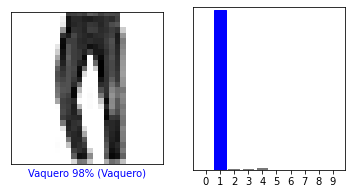

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción de las 10 primeras imágenes:


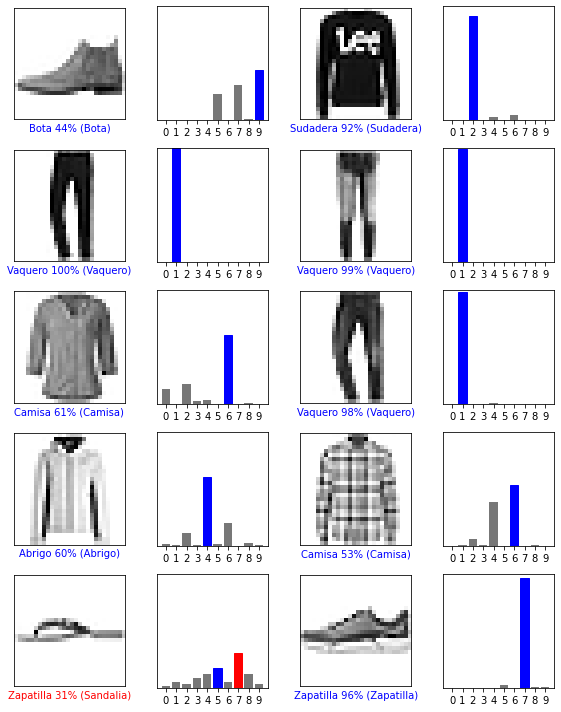

In [ ]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

La etiqueta debajo de la imagen nos devuelve el porcentaje de que se trate de la prenda de ropa correspondiente. Por ejemplo, en la imagen[8] se trata de unas sandalias y tiene una probabilidad del 31% de que el modelo las etiquete como sandalias. 

La gráfica de barras es otra forma con la que el modelo muestra la probabilidad de que la imagen[8] sean unas sandalias. Esta gráfica de barras muestra un resultado bastante interesante ya que el modelo presenta más dificultades de lo habitual en diferenciar la imagen. La probabilidad de que sean unas sandalias es inferior a la de que sean unas zapatillas, por lo que el modelo ha confundido la imagen y se equivoca al etiquetarla.

#### **MODELO 2**

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA RED
modelo2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
modelo2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
modelo2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.7739 - accuracy: 0.7404
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5095 - accuracy: 0.8278
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4689 - accuracy: 0.8395
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4493 - accuracy: 0.8455
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4362 - accuracy: 0.8499


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = modelo2.evaluate(test_images,  test_labels, verbose=2)

# Si los comparamos con los resultados del modelo de entrenamiento, la función 
# de pérdida y la precisión son similares, con lo que deducimos que no se 
# produce sobre entrenamiento

313/313 - 1s - loss: 0.4862 - accuracy: 0.8294


In [ ]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8294000029563904


**Predicciones:**

In [ ]:
predictions = modelo2.predict(test_images)
predictions[5]

array([9.3055179e-04, 9.9658233e-01, 5.7553547e-04, 3.2030870e-04,
       1.4299151e-03, 6.2526615e-09, 1.6100850e-04, 3.5775718e-09,
       3.2287613e-07, 8.5844977e-11], dtype=float32)

Predicción para la 6ª imagen:


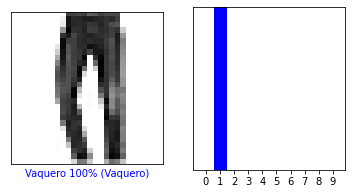

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción de las 10 primeras imágenes:

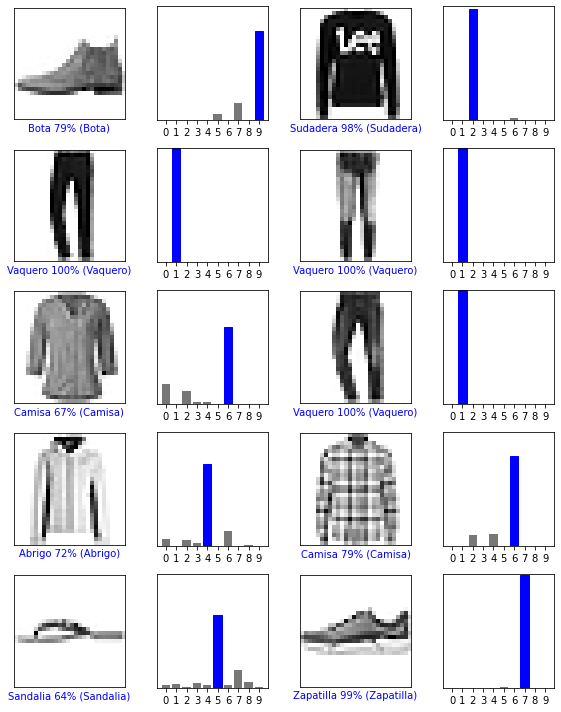

In [ ]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

La etiqueta debajo de la imagen nos devuelve el porcentaje de que se trate de la prenda de ropa correspondiente. Por ejemplo, en la imagen[0] se trata de unas botas y tiene una probabilidad del 79% de que el modelo las etiquete como botas. 

La gráfica de barras es otra forma con la que el modelo muestra la probabilidad de que la imagen[0] se trate de unas botas. El número 9 corresponde con unas botas por lo que, en el caso de la imagen[0], el modelo ha acertado. Aunque existe una pequeña probabilidad de que el modelo lo confunda con unas zapatillas o sandalias. 

Este modelo funciona correctamente ya que se ha etiquetado a todas las imágenes con la etiqueta correspondiente. 

##### **MODELO 2 MODIFICADO**

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA RED
modelo2M = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
modelo2M.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
modelo2M.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.8760 - accuracy: 0.7052
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.5311 - accuracy: 0.8219
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4809 - accuracy: 0.8364
Epoch 4/25
469/469 [==============================] - 2s 3ms/step - loss: 0.4547 - accuracy: 0.8424
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.8472
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.8522
Epoch 7/25
469/469 [==============================] - 2s 3ms/step - loss: 0.4193 - accuracy: 0.8543
Epoch 8/25
469/469 [==============================] - 2s 3ms/step - loss: 0.4124 - accuracy: 0.8553
Epoch 9/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4062 - accuracy: 0.8583
Epoch 10/25
469/469 [==============================] - 2s 3ms/step - loss: 0.4009 - accuracy: 0.8600

In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = modelo2M.evaluate(test_images,  test_labels, verbose=2)

# Si los comparamos con los resultados del modelo de entrenamiento, la función 
# de pérdida y la precisión son similares, con lo que deducimos que no se 
# produce sobre entrenamiento

313/313 - 0s - loss: 0.4272 - accuracy: 0.8490


In [ ]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8489999771118164


Al añadir más épocas ambos valores aumentan. Sin embargo, no se produce apenas sobre entrenamiento ya que los valores de prueba y de entrenamiento se mantienen, más o menos, similares. 

#### **MODELO 3**

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA RED
modelo3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

La función sigmoid transforma los valores introducidos a una escala (0,1), donde los valores altos tienen de manera asintótica a 1 y los valores muy bajos tienden de manera asintótica a 0.

In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
modelo3.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
modelo3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 2.0942 - accuracy: 0.4283
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 1.8105 - accuracy: 0.5454
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 1.5977 - accuracy: 0.5597
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 1.4400 - accuracy: 0.5885
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 1.3188 - accuracy: 0.6207


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = modelo3.evaluate(test_images,  test_labels, verbose=2)

# Si los comparamos con los resultados del modelo de entrenamiento, la función 
# de pérdida y la precisión son similares, con lo que deducimos que no se 
# produce sobre entrenamiento

313/313 - 0s - loss: 1.2732 - accuracy: 0.6255


In [ ]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.6255000233650208


**Predicciones:**

In [ ]:
predictions = modelo3.predict(test_images)
predictions[5]

array([0.11870602, 0.3873737 , 0.03847459, 0.24628387, 0.06118431,
       0.03549373, 0.05936328, 0.03371972, 0.0077025 , 0.01169835],
      dtype=float32)

Obtenemos la predicción para la 6ª imagen:

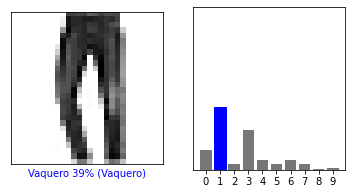

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción de las 10 primeras imágenes

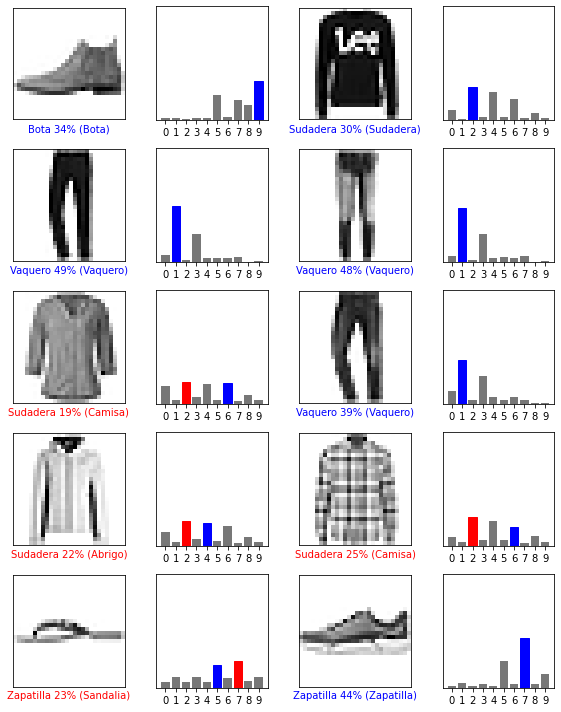

In [ ]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Debido al elevado valor de la función de perdida(1.3) y al bajo valor de precisión (62%). El modelo presenta más dificultades a la hora de etiquetar las imágenes. 

Como se puede obervar, el modelo se confunde varias veces. Etiqueta la imagen[4] con una sudadera y en verdad se trata de una camisa. Esto ocurre con más imágenes además de presentar unos gráficos de barra con poca diferencia entre las probabilidades, por ejemplo, en la imagen[6] presenta la misma probabilidad para que sea una sudadera que para que sea un abrigo y existe muy poca diferencia con la probabilidad de algunas otras prendas. 

##### **MODELO 3 MEJORADO**

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA RED
modelo3M = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
modelo3M.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Adam es una combinación de otros dos optimizadores: AdaGrad y RMSprop. Consiste en calcular la estimación en el momento de primer y segundo orden.

Para empezar una función de pérdida es aquella que nos ayuda a ver la perdida de calidad de un objeto o una imagen. 
La función pérdida sparse categorical crossentropy nos ayuda a calcular entre diferentes opciones la opción con mejor calidad que comparándolo con la función del categorical crossentropy nos ayuda a elegir la mejor opción


In [ ]:
# ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
modelo3M.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.5001 - accuracy: 0.6229
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8871 - accuracy: 0.7790
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6756 - accuracy: 0.8098
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5775 - accuracy: 0.8242
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5228 - accuracy: 0.8348


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = modelo3M.evaluate(test_images,  test_labels, verbose=2)

# Si los comparamos con los resultados del modelo de entrenamiento, la función 
# de pérdida y la precisión son similares, con lo que deducimos que no se 
# produce sobre entrenamiento

313/313 - 0s - loss: 0.5326 - accuracy: 0.8256


In [ ]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8256000280380249


**Predicciones**

In [ ]:
predictions = modelo3M.predict(test_images)
predictions[5]

array([2.7268296e-02, 9.2306834e-01, 1.8880663e-03, 1.0877279e-02,
       1.4179931e-02, 9.4747497e-04, 7.4258493e-03, 1.2674203e-02,
       1.5318327e-03, 1.3880809e-04], dtype=float32)

Obtenemos la predicción para la 6ª imagen:


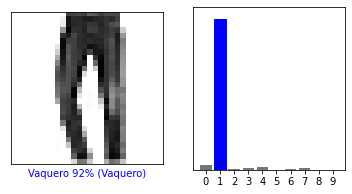

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción de las 10 primeras imágenes

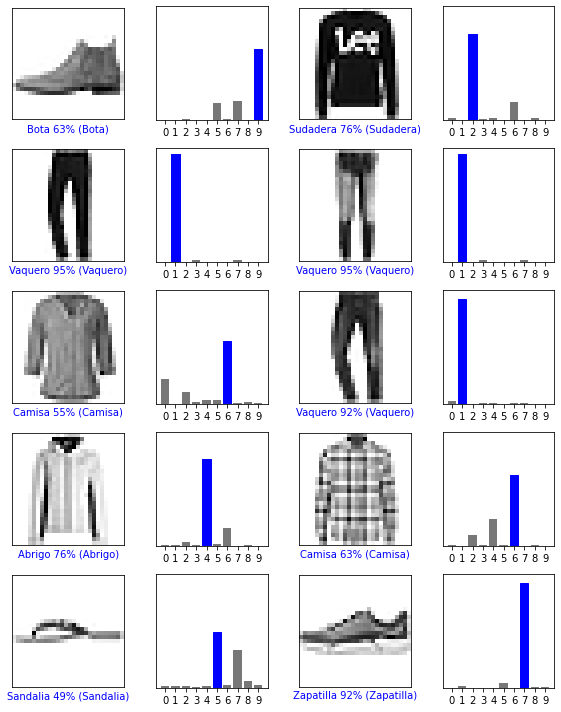

In [ ]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Utilizando el optimizador 'adam' el modelo 3 mejora considerablemente. El valor de la función de pérdida disminuye y el valor de precisión aumenta, lo que hace que el funcionamiento sea adecuado. Además, no presenta ninguna equivocación a la hora de etiquetar las 10 primeras imágenes. Aunque no se trate del mejor de los 8 casos, en comparación con el anteior ajuste de este modelo, se produce una gran mejora. 

#### **MODELO 4**

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA RED
modelo4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
modelo4.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
modelo4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 1.4224 - accuracy: 0.6350
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.8443 - accuracy: 0.7708
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.6424 - accuracy: 0.8095
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.5530 - accuracy: 0.8247
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.5036 - accuracy: 0.8344


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = modelo4.evaluate(test_images,  test_labels, verbose=2)

#No se produce apenas sobre entrenamiento

313/313 - 0s - loss: 0.5116 - accuracy: 0.8238


In [ ]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8238000273704529


**Predicciones:**

In [ ]:
predictions = modelo4.predict(test_images)
predictions[5]

array([1.3727590e-03, 9.7214431e-01, 2.1219838e-03, 8.8118343e-03,
       1.0174187e-02, 1.4346221e-03, 3.0148814e-03, 4.8711369e-04,
       1.0079532e-04, 3.3760001e-04], dtype=float32)

Obtenemos la predicción para la 6ª imagen:

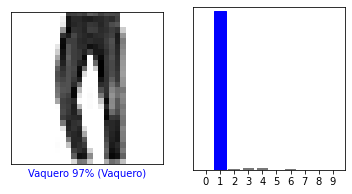

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción de las 10 primeras imágenes

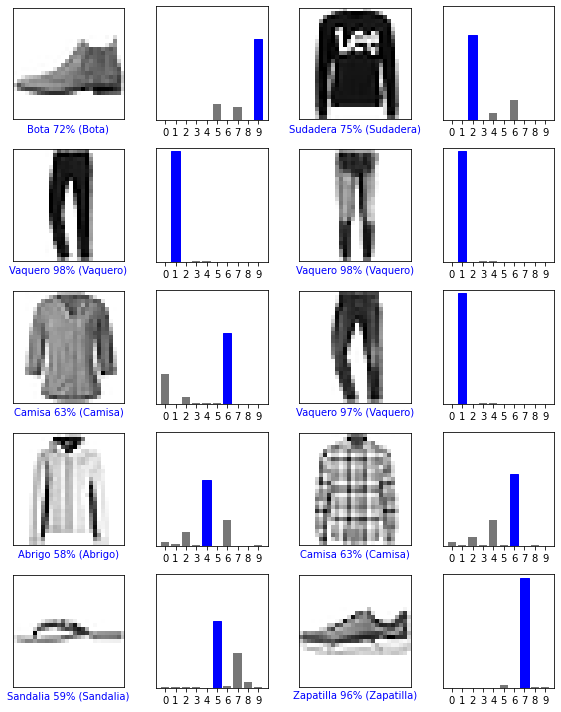

In [ ]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### **MODELO 5**

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA RED, variando los parámetros
modelo5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
modelo5.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
modelo5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 1.0477 - accuracy: 0.6839
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.6714 - accuracy: 0.7840
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.5887 - accuracy: 0.8094
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.5453 - accuracy: 0.8208
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.5169 - accuracy: 0.8276


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = modelo5.evaluate(test_images,  test_labels, verbose=2)

# Si los comparamos con los resultados del modelo de entrenamiento, la función 
# de pérdida y la precisión son similares, con lo que deducimos que no se 
# produce sobre entrenamiento

313/313 - 1s - loss: 0.5288 - accuracy: 0.8203


In [ ]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8202999830245972


**Predicciones:**

In [ ]:
predictions = modelo5.predict(test_images)
predictions[5]

array([4.4464353e-03, 9.8260707e-01, 4.4717270e-04, 3.0494619e-03,
       8.4199300e-03, 1.9726017e-06, 9.9559675e-04, 1.4860329e-06,
       2.9337756e-05, 1.6008639e-06], dtype=float32)

Predicción para la 6ª imagen:

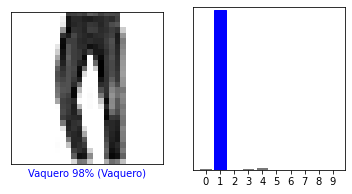

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción de las 10 primeras imágenes:

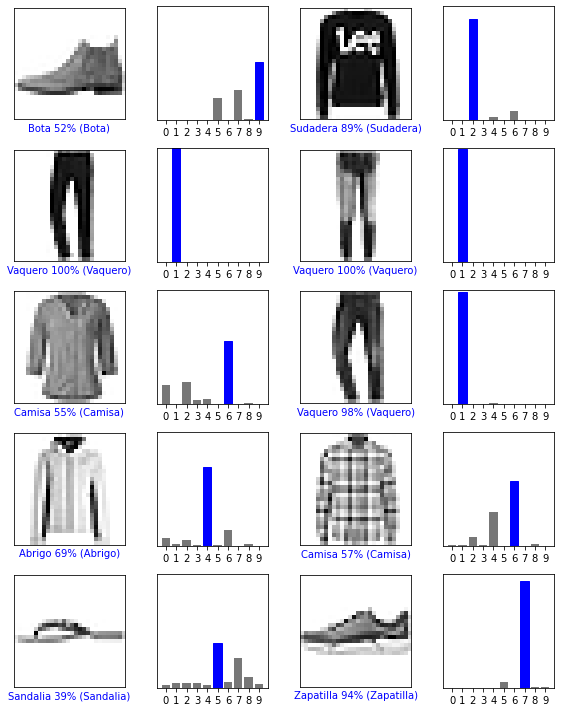

In [ ]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### **MODELO 6**

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA RED, variando los parámetros
modelo6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
modelo6.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
modelo6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.5610 - accuracy: 0.8012
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.3820 - accuracy: 0.8599
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.3370 - accuracy: 0.8764
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.3097 - accuracy: 0.8864
Epoch 5/5
469/469 [==============================] - 8s 18ms/step - loss: 0.2938 - accuracy: 0.8912


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = modelo6.evaluate(test_images,  test_labels, verbose=2)

# El modelo presenta sobre entrenamiento ya que, comparando estos valores con 
# con los obtenidos en el modelo de entrenamiento, se observa que los valores 
# son diferentes 

313/313 - 1s - loss: 0.3643 - accuracy: 0.8708


In [ ]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8708000183105469


**Predicciones:**

In [ ]:
predictions = modelo6.predict(test_images)
predictions[5]

array([2.2248198e-05, 9.9997580e-01, 2.7574423e-08, 1.0832450e-06,
       1.7299504e-07, 7.9927829e-16, 6.4986614e-07, 6.8983587e-17,
       5.3584637e-11, 4.2300772e-17], dtype=float32)

Predicción para la 6ª imagen:

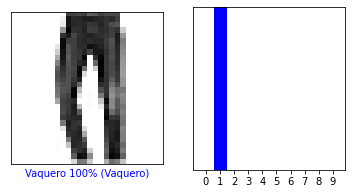

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción de las 10 primeras imágenes:

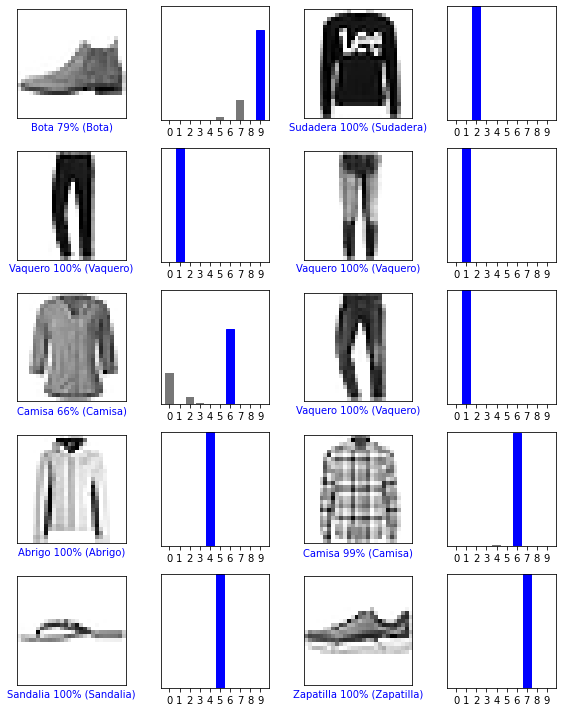

In [ ]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### **MODELO 7**

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA RED, variando los parámetros
modelo7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
modelo7.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
modelo7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 15ms/step - loss: 1.7078 - accuracy: 0.5812
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 1.1326 - accuracy: 0.7092
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.9258 - accuracy: 0.7297
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.8232 - accuracy: 0.7421
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.7617 - accuracy: 0.7521


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = modelo7.evaluate(test_images,  test_labels, verbose=2)

# Si los comparamos con los resultados del modelo de entrenamiento, la función 
# de pérdida y la precisión son similares, con lo que deducimos que no se 
# produce sobre entrenamiento

313/313 - 2s - loss: 0.7507 - accuracy: 0.7510


In [ ]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.7509999871253967


**Predicciones:**

In [ ]:
predictions = modelo7.predict(test_images)
predictions[5]

array([5.5215135e-02, 7.8948283e-01, 1.3625827e-02, 7.3826849e-02,
       3.1278547e-02, 7.2499021e-04, 3.3968098e-02, 4.2592283e-04,
       1.1455618e-03, 3.0624360e-04], dtype=float32)

Predicción para la 6ª imagen:

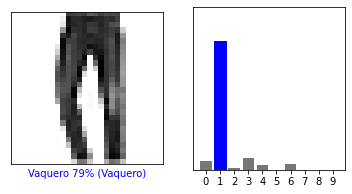

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción de las 10 primeras imágenes:

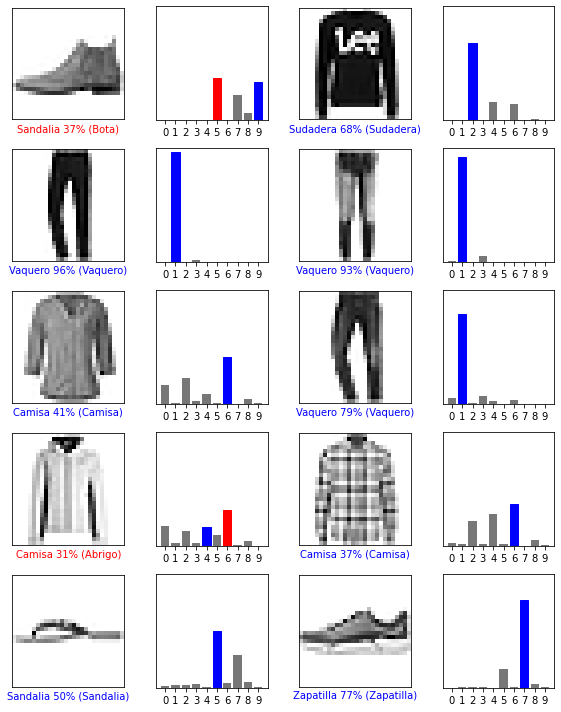

In [ ]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

El modelo present

##### **MODELO 7 MODIFICADO**

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA RED, variando los parámetros
modelo7M = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
modelo7M.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
modelo7M.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 5s 9ms/step - loss: 1.7186 - accuracy: 0.5730
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 1.1355 - accuracy: 0.7096
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.9293 - accuracy: 0.7300
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.8264 - accuracy: 0.7427
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7640 - accuracy: 0.7518
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7213 - accuracy: 0.7592
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6898 - accuracy: 0.7667
Epoch 8/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6649 - accuracy: 0.7726
Epoch 9/25
469/469 [==============================] - 4s 8ms/step - loss: 0.6446 - accuracy: 0.7783
Epoch 10/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6274 - accuracy: 0.7840

In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = modelo7M.evaluate(test_images,  test_labels, verbose=2)

# Si los comparamos con los resultados del modelo de entrenamiento, la función 
# de pérdida y la precisión son similares, con lo que deducimos que no se 
# produce sobre entrenamiento

313/313 - 1s - loss: 0.5328 - accuracy: 0.8095


In [ ]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.809499979019165


En este caso, al añadir épocas el modelo progresa adecuadamente. Los valores de pérdida disminuyen y los valores de precisión aumentan con ambos datos lo que hace que no haya sobre entrenamiento

#### **MODELO 8**

In [ ]:
# CONSTRUIMOS LA ARQUITECTURA DE LA RED, variando los parámetros
modelo8 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
  
])

In [ ]:
# HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
modelo8.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
modelo8.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 19ms/step - loss: 0.5862 - accuracy: 0.7947
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.4268 - accuracy: 0.8459
Epoch 3/5
469/469 [==============================] - 10s 21ms/step - loss: 0.3866 - accuracy: 0.8589
Epoch 4/5
469/469 [==============================] - 9s 19ms/step - loss: 0.3604 - accuracy: 0.8677
Epoch 5/5
469/469 [==============================] - 9s 19ms/step - loss: 0.3395 - accuracy: 0.8762


In [ ]:
# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = modelo8.evaluate(test_images,  test_labels, verbose=2)

# Si los comparamos con los resultados del modelo de entrenamiento, la función 
# de pérdida y la precisión son similares, con lo que deducimos que no se 
# produce sobre entrenamiento

313/313 - 1s - loss: 0.3891 - accuracy: 0.8613


In [ ]:
# Precisión del test
print('\nTest accuracy:', test_acc)


Test accuracy: 0.861299991607666


**Predicciones**

In [ ]:
predictions = modelo8.predict(test_images)
predictions[5]

array([3.8723054e-03, 9.9499929e-01, 1.4511544e-04, 3.7553528e-04,
       5.2893220e-04, 9.1320347e-09, 6.8301211e-05, 1.0472957e-06,
       9.4605766e-06, 1.4425351e-09], dtype=float32)

Predicción para la 6ª imagen:

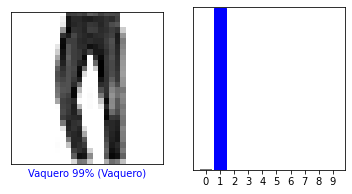

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Predicción de las 10 primeras imágenes:

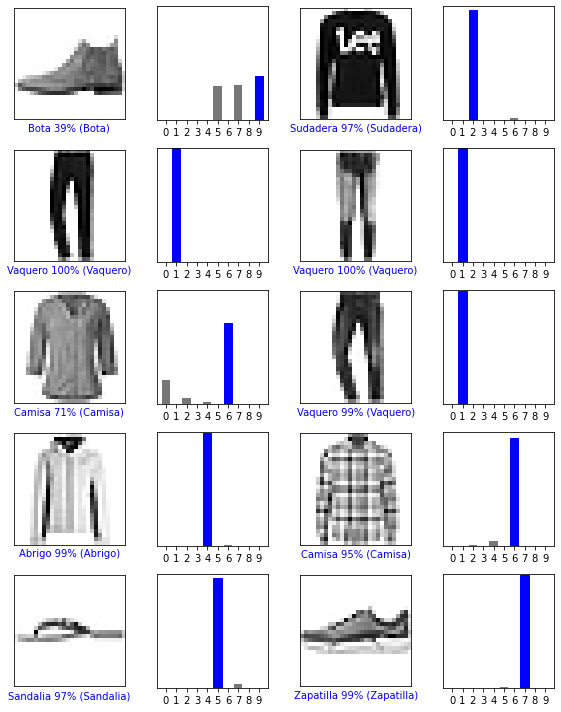

In [ ]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Se trata de un modelo adecuado que parece funcionar correctamente y no presenta fallo a la hora de etiquetar las imágenes y diferenciarlas. 

## ***3. Conclusiones***

Una vez analizados los 8 modelos y sus variaciones, cabe destacar la importancia del valor de la función de pérdida y la precisión, tanto con los datos de entrenamiento como los de prueba. La relación que se establezca entre ambos modelos (entrenamiento y prueba) predecirá notablemente el desarrollo de dicho modelo. Claro esta que estos valores dependen a su vez, del número de neuronas que se introduzcan, las funciones de activación y el optimizador que se este utilizando. 

El modelo que presenta el mejor funcionamiento es el modelo 6, ya que consta con un valor de pérdida poco elevado, 0.2938, y una precisión del 89%. Por lo que la red neuronal funcionará mejor con 512 neuronas en la capa 1, una función de activación 'relu', además de 'softmax', y el optimizador 'rmsprop'. 

Al añadir más épocas a los modelos hemos comprobado que estos mejoran ya que varían sus valores de pérdida y precisión a unos valores más adecuados y funcionales. 

Gracias a esta práctica, podemos decir que creemos que entendemos mejor el funcionamiento de una red neuronal y el procesamiento de los datos. 

## ***4. Bibliografía***

1) "Clasificacion Basica: Predecir una imagen de moda". En: tensorflow.org. 

 https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

 2) "¿Cuál es la diferencia entre la función de pérdida y la métrica en Keras". Zaratruta. 16 enero 2018. 

 https://www.it-swarm-es.com/es/machine-learning/cual-es-la-diferencia-entre-la-funcion-de-perdida-y-la-metrica-en-keras/836531525/ 

 3) "Función de activación – Redes neuronales". Calvo, Diego.  Dic 7, 2018.

 https://www.diegocalvo.es/funcion-de-activacion-redes-neuronales/ 

 4) "What is the difference between sparse_categorical_crossentropy and categorical_crossentropy?"
 https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c